### This code aims at comparing the displacement produced by a single nucleus of strain versus the displacement produced by a very small prisms by using our methodology that adopts the closed expressions of the full integrations  of Nagy et al. (2000) and Nagy et al. (2002).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pickle

In [2]:
import compaction as cp
import geertsma_nucleus_strain as ns

In [3]:
#Parameters describing the prism
y1 = -1
y2 =  1
x1 = -1
x2 =  1
z1 =  750
z2 =  751
prism = np.array([[y1, y2, x1, x2, z2, z1]])
volume_prism = (y2-y1)*(x2-x1)*(z2-z1)

In [4]:
# Geertsma’s nucleus of strain model  Equation 12.39 page 404 of the Book 
# Fjaer, E., et al., 2008. Petroleum Related Rock Mechanics, 2nd ed. Elsevier.
yc = 0.5*(y1+y2)
xc = 0.5*(x1+x2)
zc = 0.5*(z1+z2)
nucleus  = np.array([[yc, xc, zc]])

In [5]:
print('Number of nucleus of strain is:', nucleus.shape[0])


Number of nucleus of strain is: 1


In [6]:
# Pressure variation (in MPa)
DP = -40

#### Young’s modulus $E$ and  Poisson's ratio $\nu$ 

In [7]:
# Young’s modulus (in MPa)
young = 3300

# Poisson coefficient
poisson = 0.25

### The uniaxial compaction coefficient $C_m$ 
$C_m = \frac{1}{E} \: \frac{(1 + \nu) (1  - 2\nu)}{(1-\nu)}$

In [8]:
cm = cp.Cm(poisson, young) # uniaxial compaction coefficient in 1/MPa
print ('CM', cm)

CM 0.0002525252525252525


### Coordinates on the plane x = 0 m

In [9]:
# Define computation points on cross-sections at x  = 0
shape = (120, 24)
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
y, z = np.meshgrid(y, z)
y = y.ravel()
z = z.ravel()
x = np.zeros_like(y)
coordinates = np.vstack([y, x, z])

#### Compute the displacement components on plane x = 0 m¶

In [10]:
# Compute the x-component of displacement
displacement_x_prism = cp.displacement_x_component(
    coordinates, prism, DP, poisson, young)

# Compute the y-component of displacement
displacement_y_prism = cp.displacement_y_component(
    coordinates, prism, DP, poisson, young)

# Compute the z-component of displacement
displacement_z_prism = cp.displacement_z_component(
    coordinates, prism, DP, poisson, young)

In [11]:
# horizontal component of displacement equation (39)
displacement_horizontal_prism = np.sqrt(
    displacement_x_prism**2 + displacement_y_prism**2)

### Geertsma’s nucleus of strain model:  Compute the displacement  components on plane x = 0 m

In [12]:
# Compute the x-component of displacement
displacement_x_nucleus = ns.displacement_x_component(
    coordinates, nucleus, volume_prism*DP, poisson, young)

# Compute the y-component of displacement
displacement_y_nucleus = ns.displacement_y_component(
    coordinates, nucleus, volume_prism*DP, poisson, young)

# Compute the z-component of displacement
displacement_z_nucleus = ns.displacement_z_component(
    coordinates, nucleus, volume_prism*DP, poisson, young)

In [13]:
# horizontal component of displacement 
displacement_horizontal_nucleus = np.sqrt(
    displacement_x_nucleus**2 + displacement_y_nucleus**2)

## PLOT DISPLACEMENT FIELD BY OUR METHODOLOGY that used the closed expressions of the full integrations  of Nagy et al. (2000) and Nagy et al. (2002).

### Plot the results of the displacement fields on plane x = 0 m

In [14]:
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

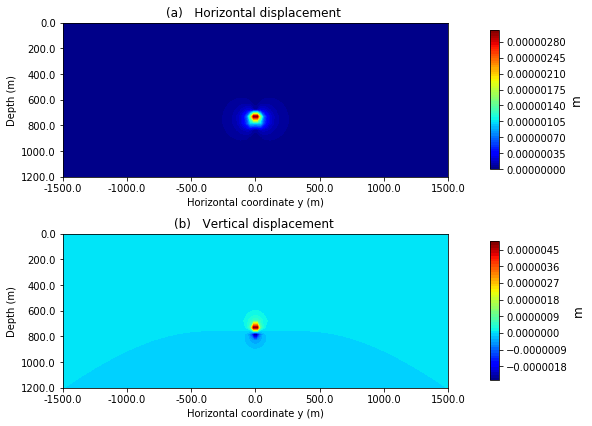

In [15]:
# Plot the displacement fields 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal_prism.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement ")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z_prism.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement.png', dpi=600)

# Plot the displacement fields by using Geertsma's (1973) nucleus of strain

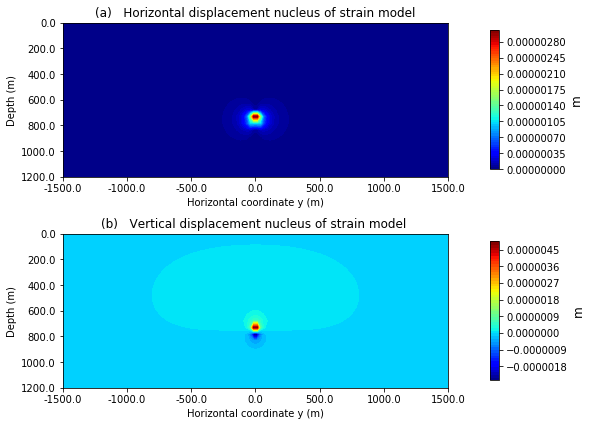

In [16]:
# Plot the displacement fields by using Geertsma's (1973) nucleus of strain
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal_nucleus.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Horizontal displacement nucleus of strain model")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z_nucleus.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b)   Vertical displacement nucleus of strain model ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")
plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement_Nucleus_Strain.png', dpi=600)

In [17]:
#Difference Horizontal Displacement Nagy Geertsma nucleus 
diff_horizontal = displacement_horizontal_prism - displacement_horizontal_nucleus

#Difference Vertical Displacement Nagy Geertsma nucleus 
diff_Vertical = displacement_z_prism - displacement_z_nucleus

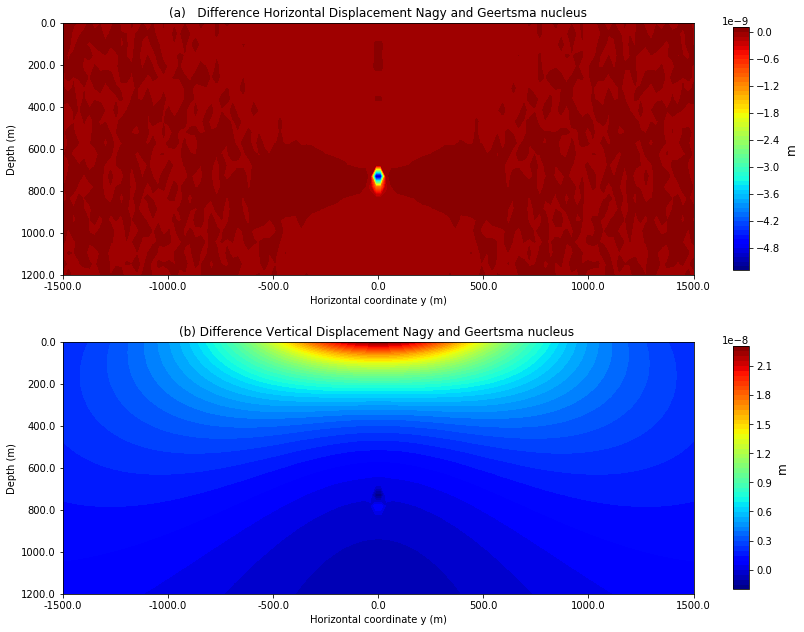

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,9))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, diff_horizontal.reshape(shape[::-1]), 
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[0], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[0].set_title("(a)   Difference Horizontal Displacement Nagy and Geertsma nucleus")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("Horizontal coordinate y (m)")
ax[0].set_ylabel("Depth (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, diff_Vertical.reshape(shape[::-1]),  
                  60, cmap="jet")
cb = plt.colorbar(img, ax=ax[1], aspect=15, pad=0.05, shrink=0.90)
cb.set_label('m', rotation=90, fontsize=12)
ax[1].set_title("(b) Difference Vertical Displacement Nagy and Geertsma nucleus ")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("Horizontal coordinate y (m)")
ax[1].set_ylabel("Depth (m)")

plt.tight_layout(True)
#plt.savefig('../manuscript/Fig/Figure_Displacement_Geertsma.png', dpi=600)